In [1]:
import os
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import image as mpimg
import cv2 as cv
import time 

from my_constants import *
from visualisation import *
from detect_give_way import *

In [2]:
# only for ipynb
########################## direcotry related

# ------------------------ often modified
CURRENT_DIR = 5

# ------------------------ often left alone
SIGN_DIR = "./my-dataset/give-way/"
CAMERA_DIR = "phone-cam"
# CAMERA_DIR = "phone-cam"
DATA_DIR = SIGN_DIR + CAMERA_DIR

ORIGINAL_DATA = "the_dataset"
DOWNSCALED_DATA = "downscaled_352x288"
NO_DATA_SEPARATION = ""

all_gw_dirs = sorted(os.listdir(DATA_DIR))
print(all_gw_dirs)
for i in range(0, len(all_gw_dirs)):
    all_gw_dirs[i] = os.path.join(DATA_DIR, all_gw_dirs[i])

GIVE_WAY_DIR = os.path.join(all_gw_dirs[CURRENT_DIR], NO_DATA_SEPARATION)

['angled_signs', 'calibration', 'dark_distance_stresser_test', 'easy_thick_sign_set', 'easy_thin_sign_set', 'fun_uni_groza_set', 'single_sign_neighborhood_set']


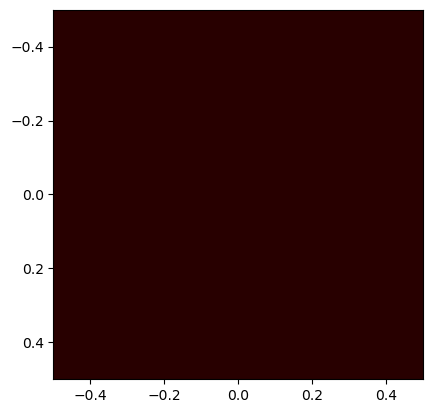

In [3]:

view_hsv_pixel(0, 255, 40)
# view_hsv_pixel(ALLOWED_RED_HUE_OFFSET, DARK_MIN_RED_SATURATION, DARK_MIN_RED_VALUE)
# view_hsv_pixel(ALLOWED_RED_HUE_OFFSET, BRIGHT_MIN_RED_SATURATION, VALUE_DELIMITER)

In [4]:
# downscale by hand every image

def downscale_images(gw_images):
    for i in range(len(gw_images)):
        gw_images[i] = cv.medianBlur(gw_images[i], 5)
        gw_images[i] = cv.resize(gw_images[i], (240, 320))
    return gw_images

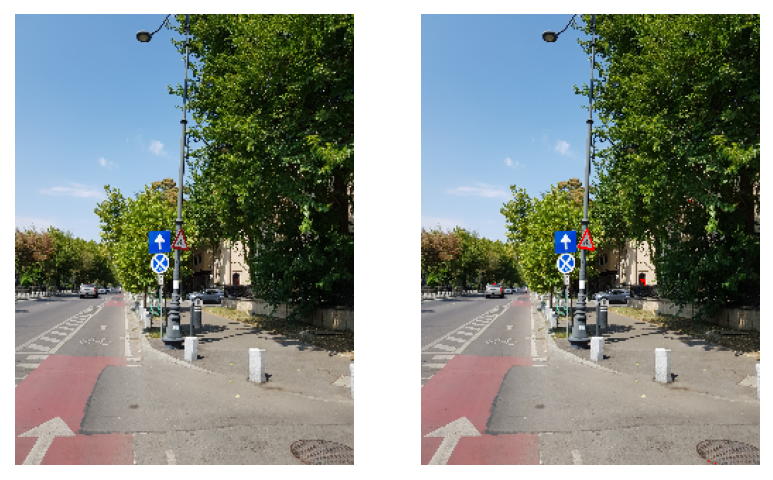

In [5]:
CUR_IMG = 43
imagesToView = [0]

gw_images = []
for img_name in sorted(os.listdir(GIVE_WAY_DIR)):
    # UNCOMMENT for desired rotation

    # gw_images.append(mpimg.imread(os.path.join(GIVE_WAY_DIR, img_name)))
    # gw_images.append(np.rot90(mpimg.imread(os.path.join(GIVE_WAY_DIR, img_name))))
    # gw_images.append(np.rot90(np.rot90(mpimg.imread(os.path.join(GIVE_WAY_DIR, img_name)))))
    gw_images.append(np.rot90(np.rot90(np.rot90(mpimg.imread(os.path.join(GIVE_WAY_DIR, img_name))))))

downscale_images(gw_images)

view_red_in_pictures(gw_images, imagesToView)

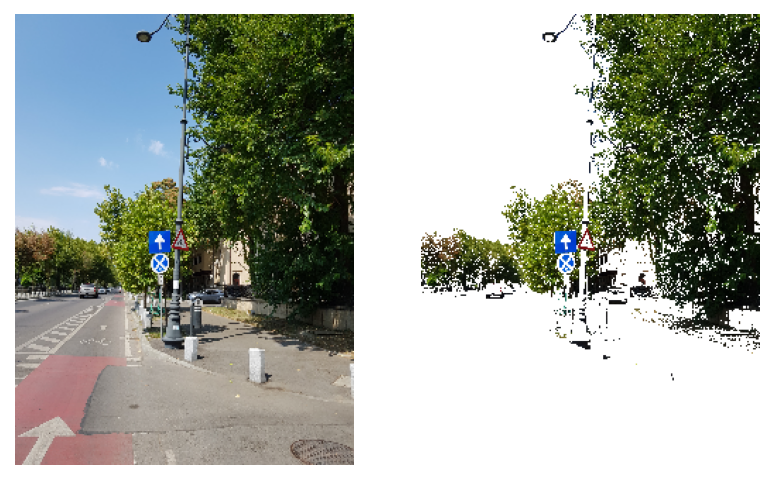

In [6]:
view_white_in_pictures(gw_images, imagesToView)

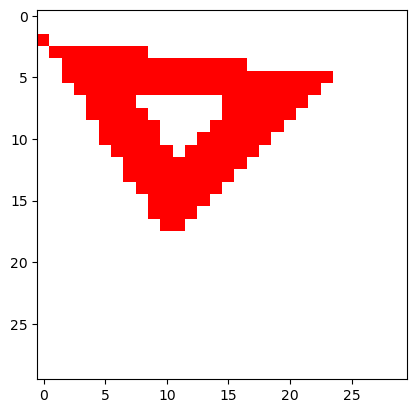

In [7]:
p_image = gw_images[0][0:30, 0:30].copy()
whiteout_img(p_image)
drwa_gw(p_image, give_way_chunk(point(0, 2), point(24, 5), point(10, 18)))

plt.imshow(p_image)

15
pic 0
avg time 0.2842717170715332


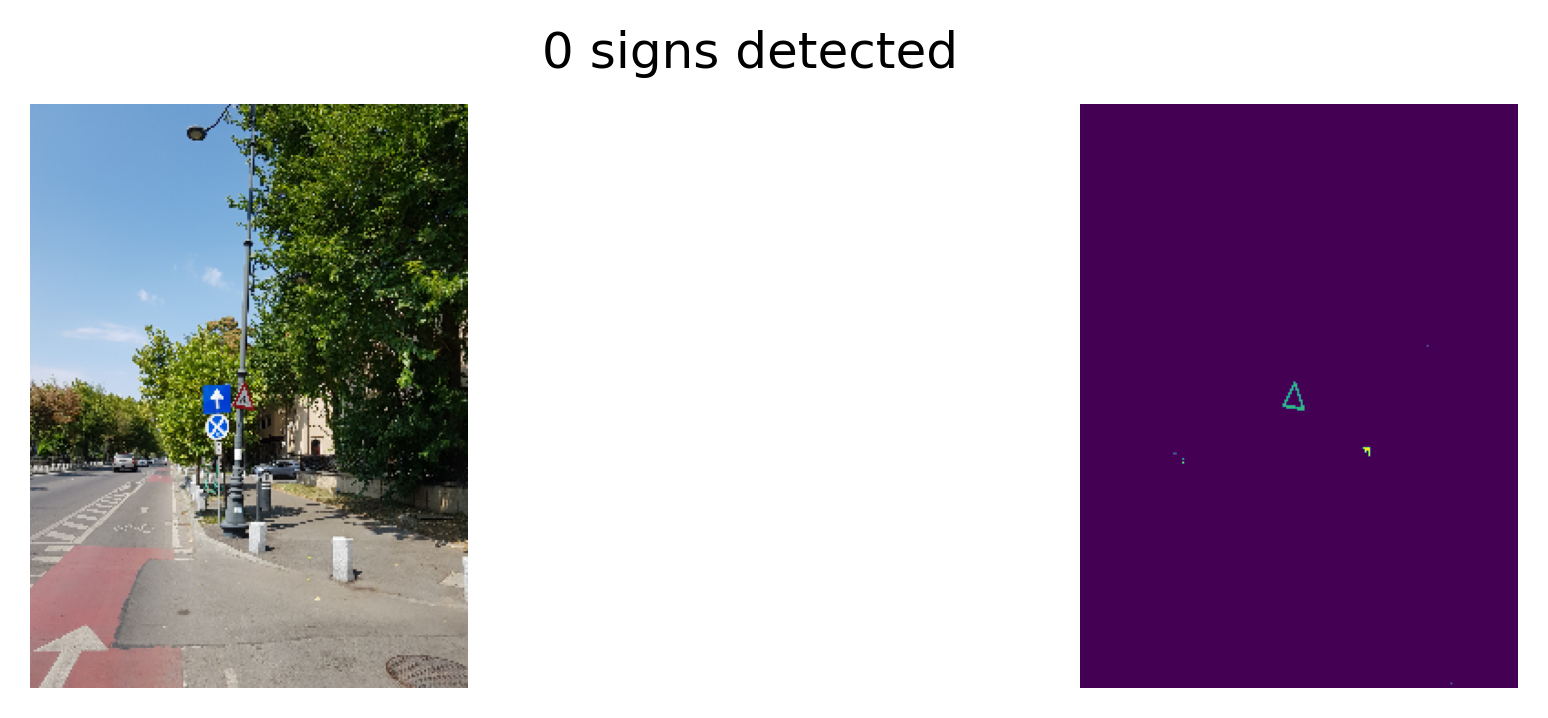

pic 1
too much red outside: 0.6086956521739131
too much red outside: 0.45714285714285713
too much red outside: 0.8333333333333334
avg time 0.3481711149215698


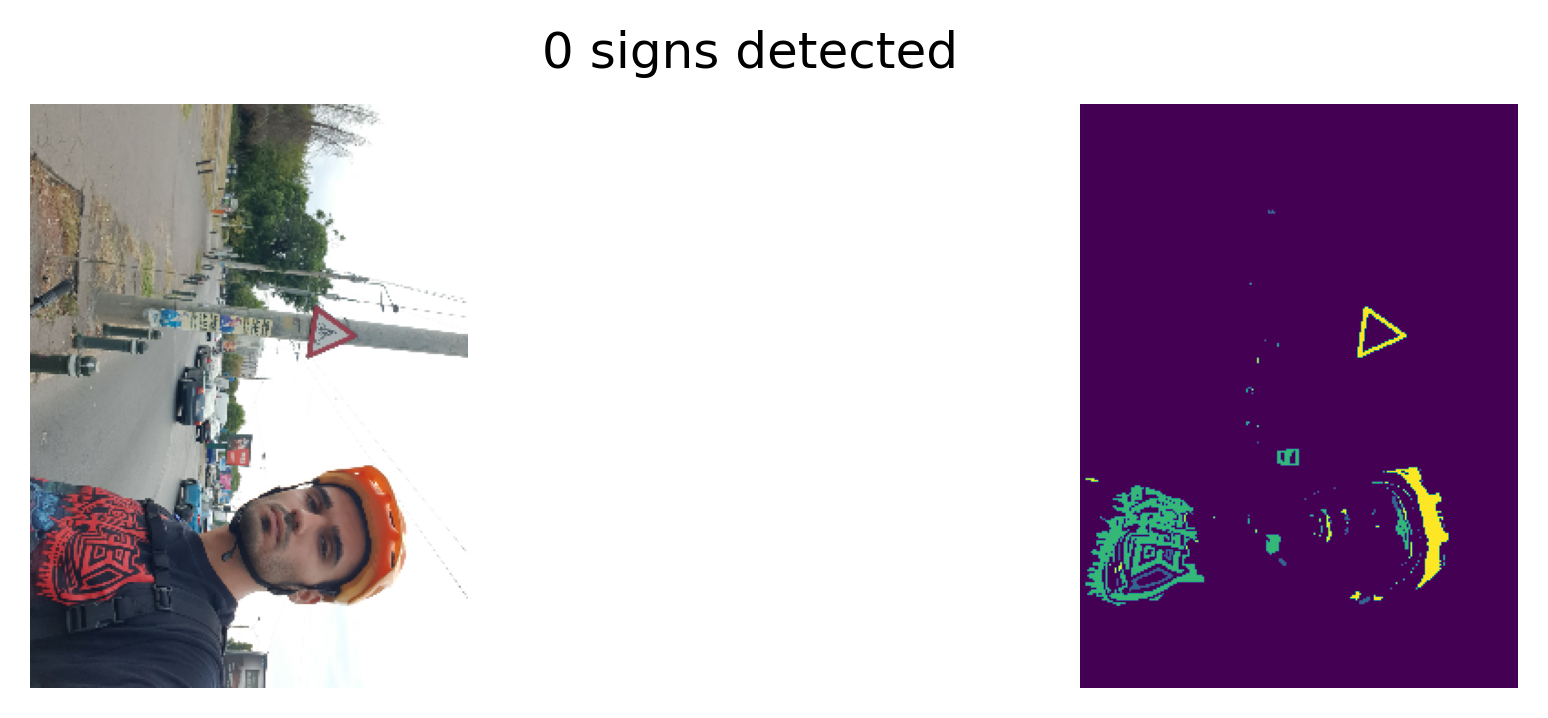

pic 2
outer: 1.045718031829378 inner 0.9243813046943997
too much red outside: 0.45555555555555555
too much red outside: 0.8333333333333334
avg time 0.351703405380249


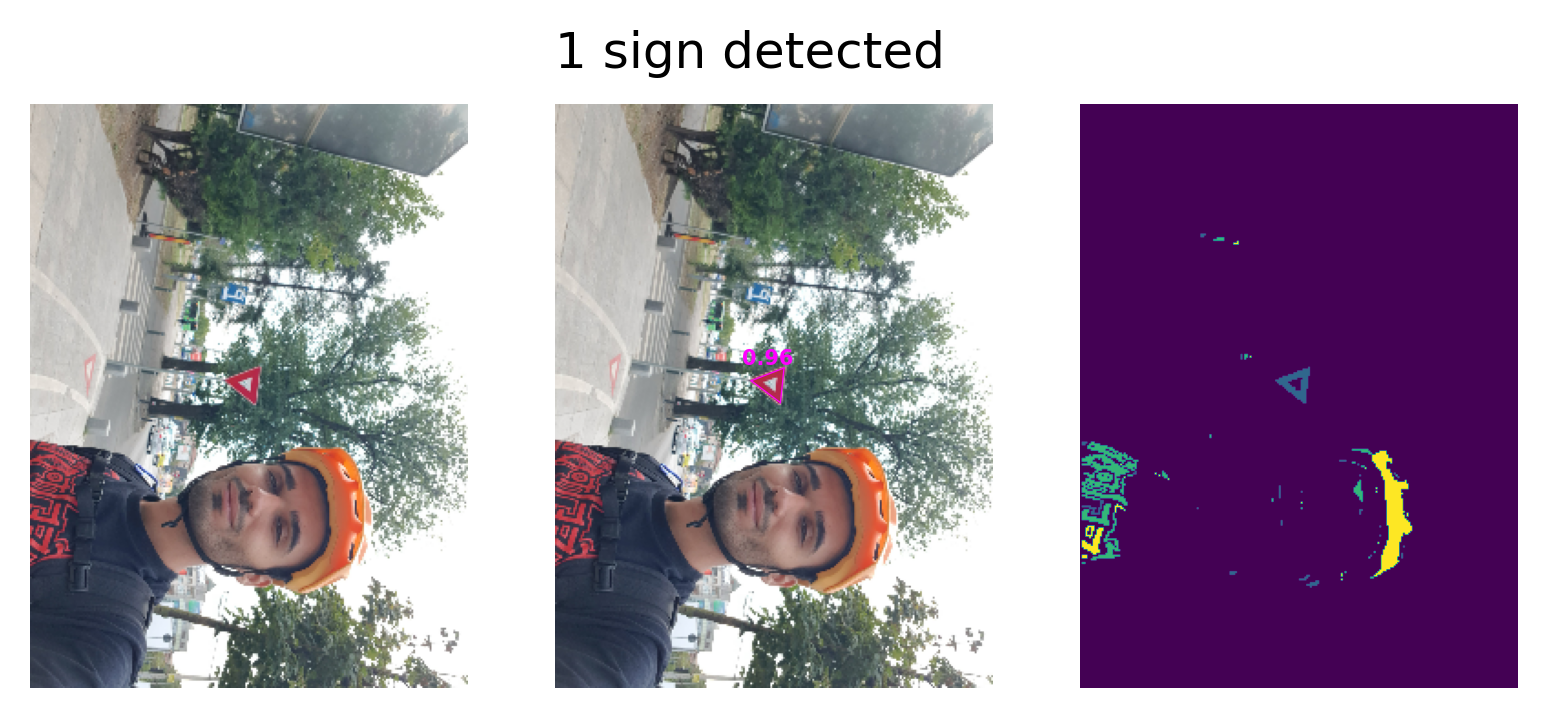

pic 3
outer: 0.6069552212715934 inner 0.8808685222690614
outer: 0.0 inner 1.0382059800664414
avg time 0.3361011743545532


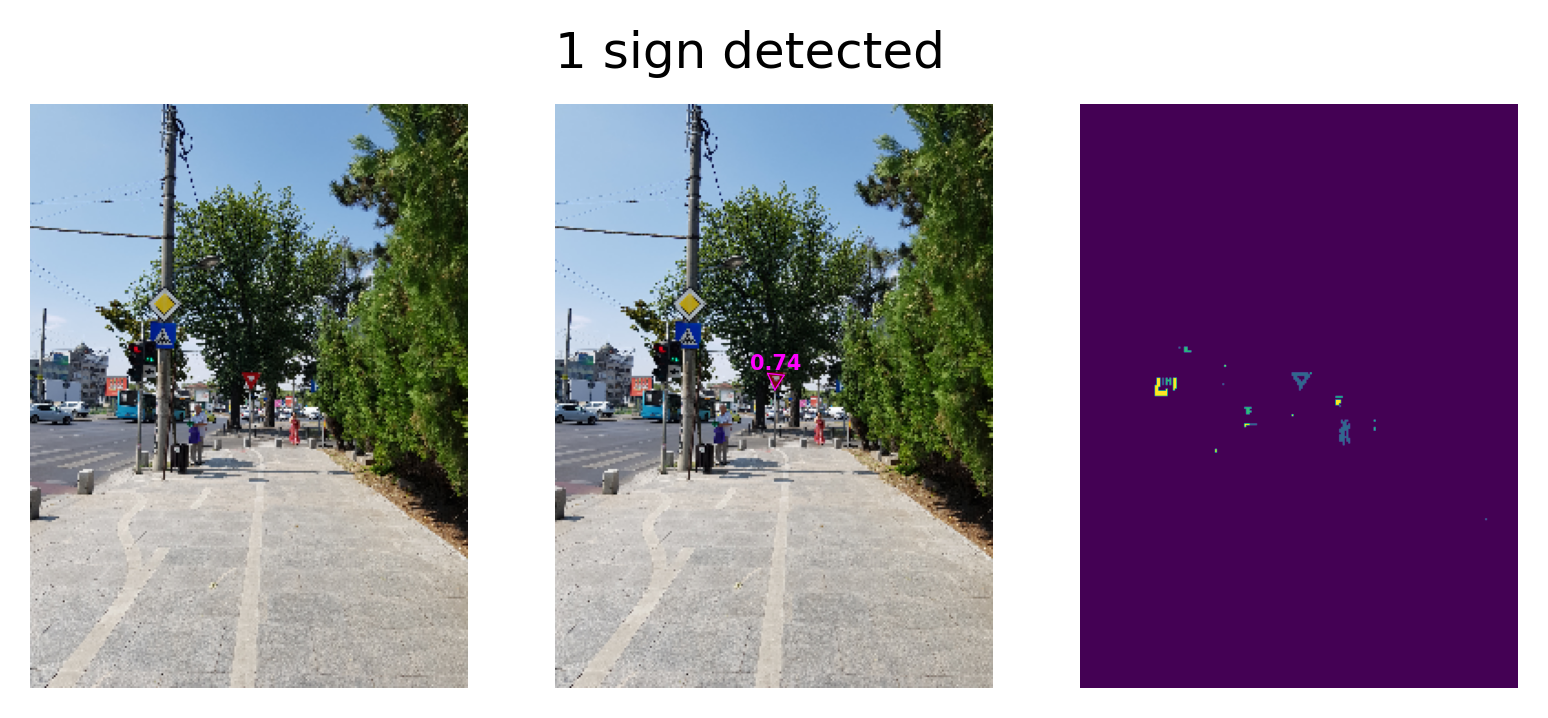

pic 4
outer: 1.0327772089699927 inner 0.9652658728320127
too much red outside: 0.44
outer: 0.0 inner 1.3842746400885895
avg time 0.329619836807251


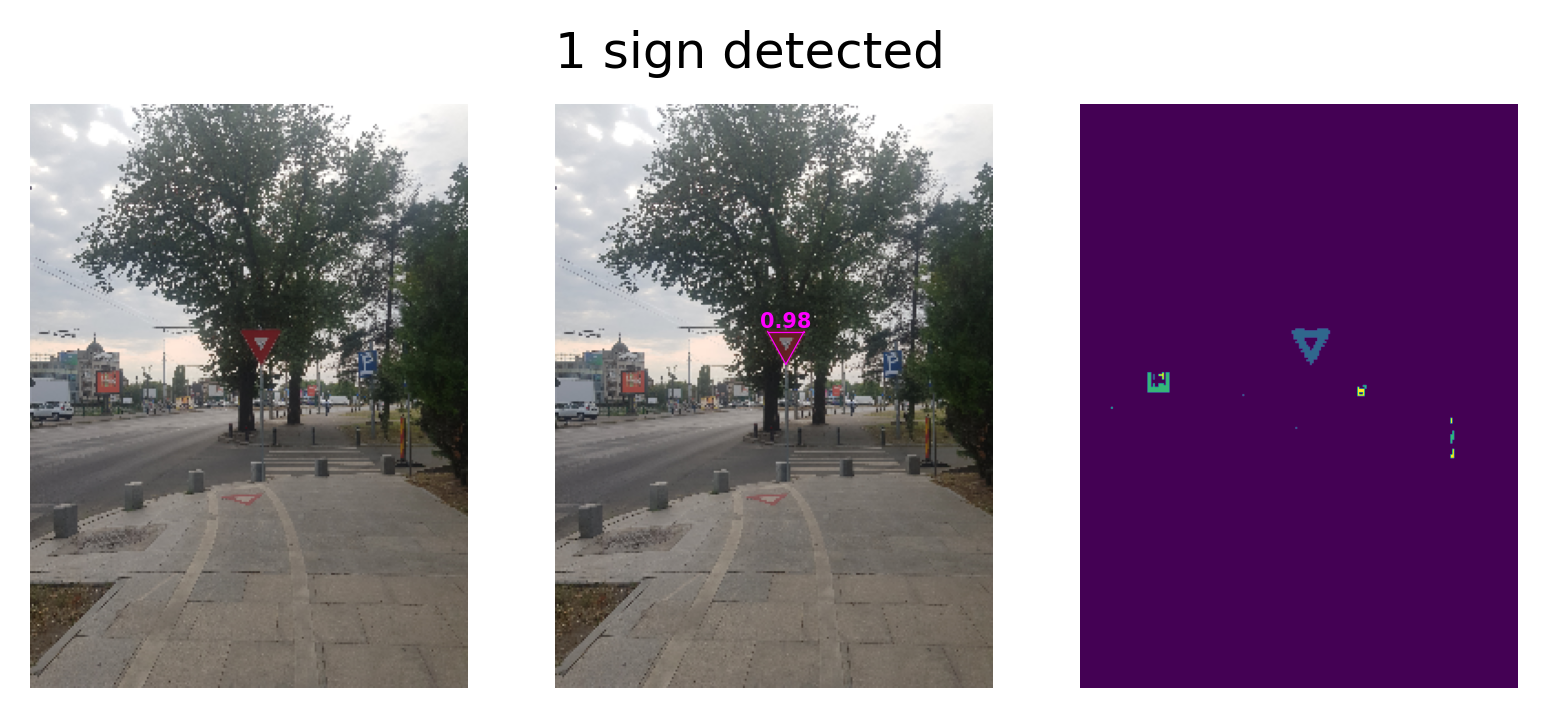

pic 5
outer: 1.0106280744323273 inner 0.9384409828613103
avg time 0.34058229128519696


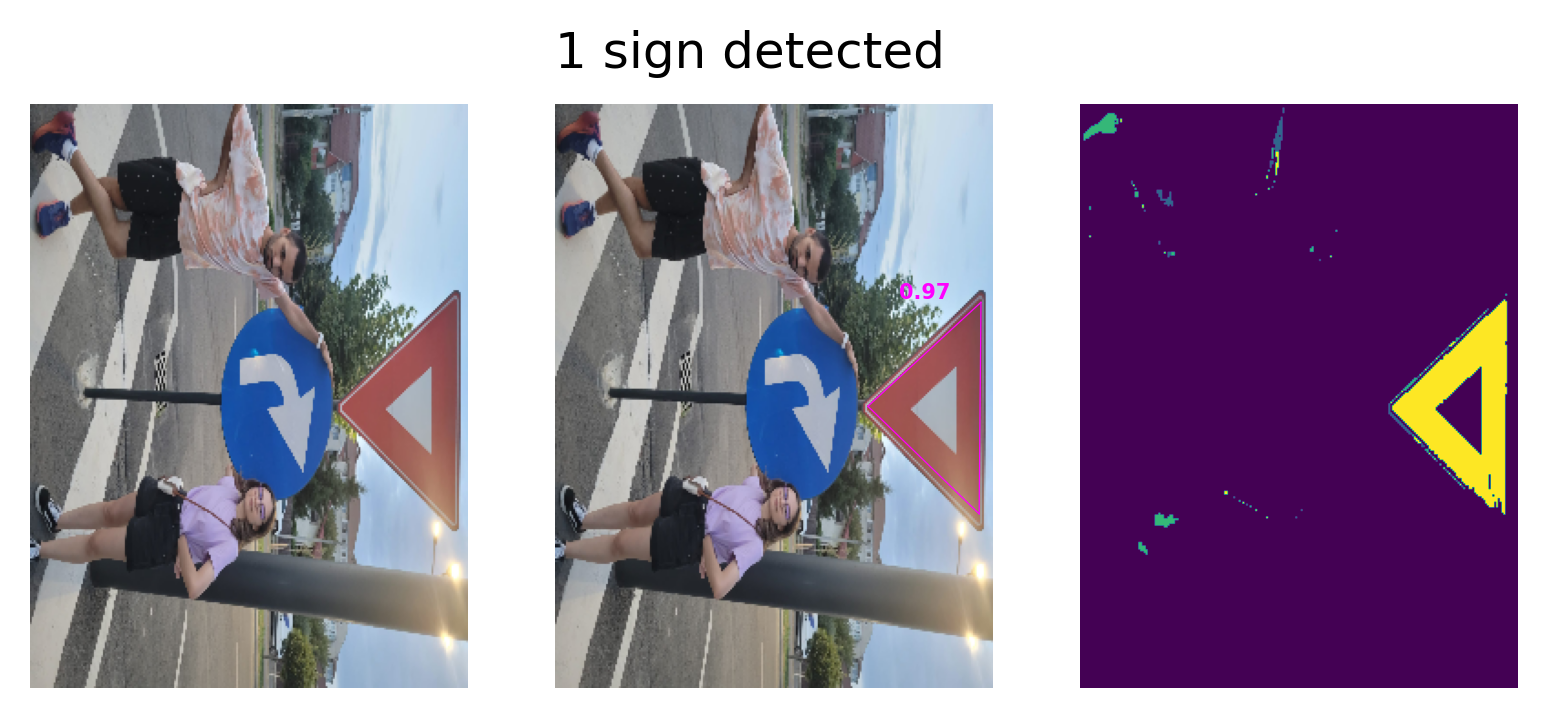

pic 6
too much red outside: 0.6666666666666666
avg time 0.31862456457955496


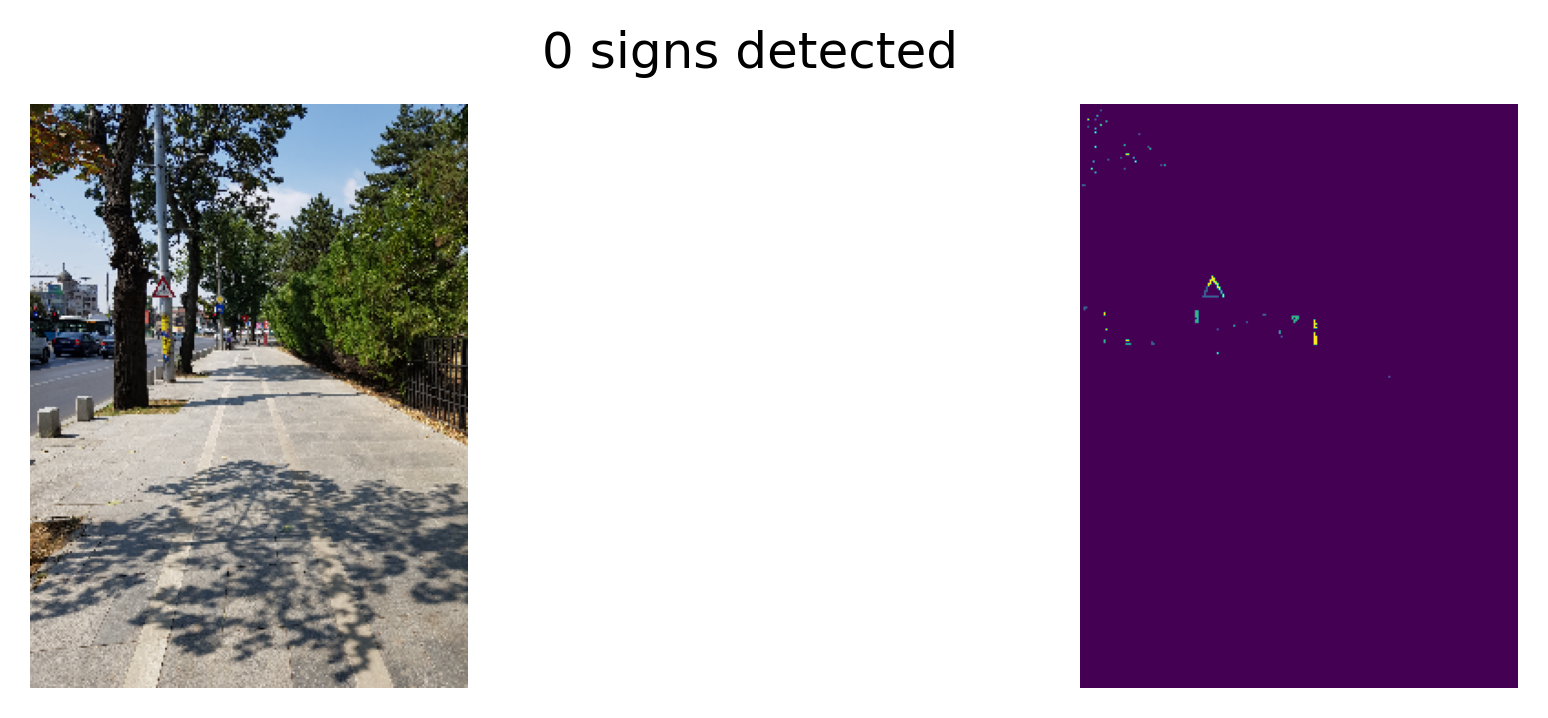

pic 7
outer: 0.7397266759247616 inner 0.8588468092123336
outer: 0.0 inner 0.7981202671468169
outer: 0.35865535802412496 inner 0.6766671830157786
avg time 0.3519870340824127


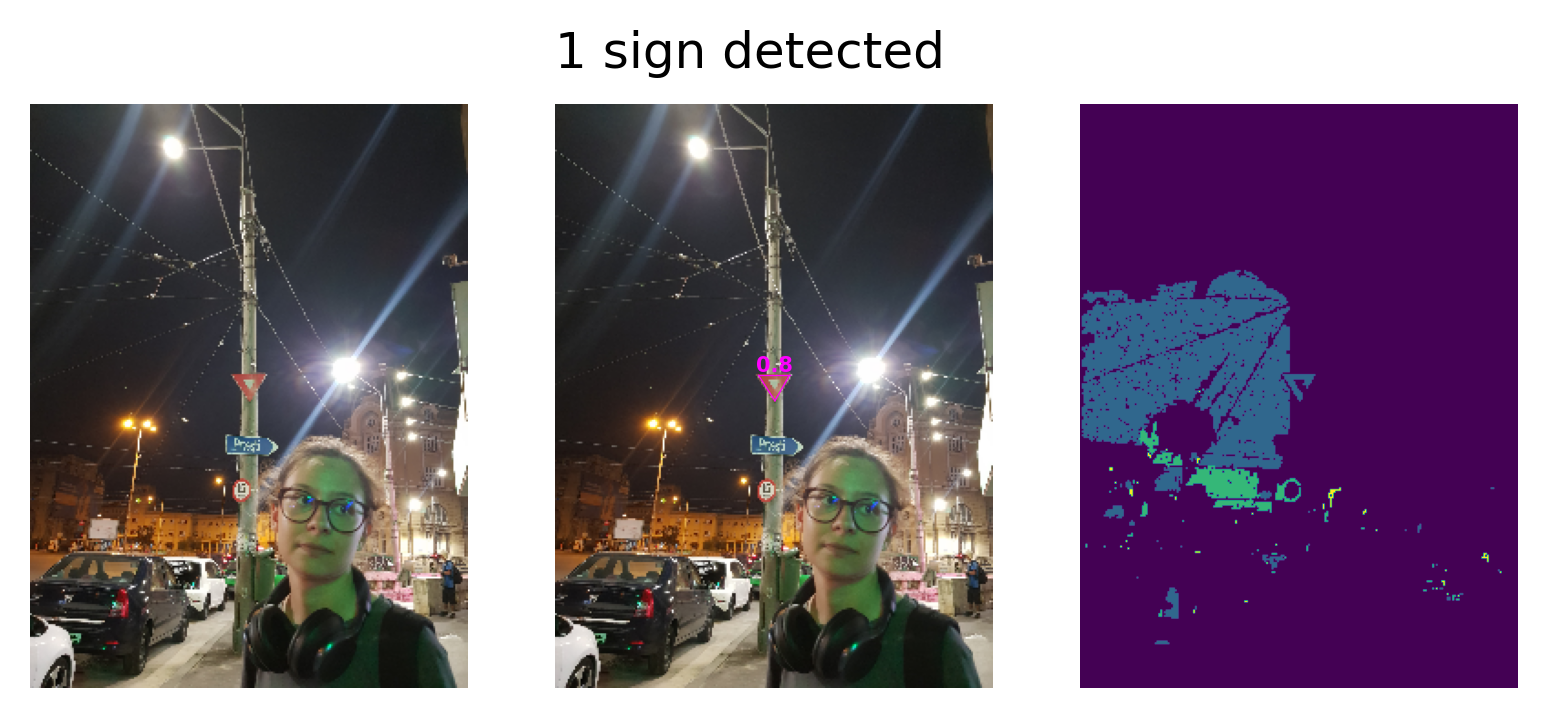

pic 8
outer: 0.9219044941651049 inner 0.932630899350851
avg time 0.3384737968444824


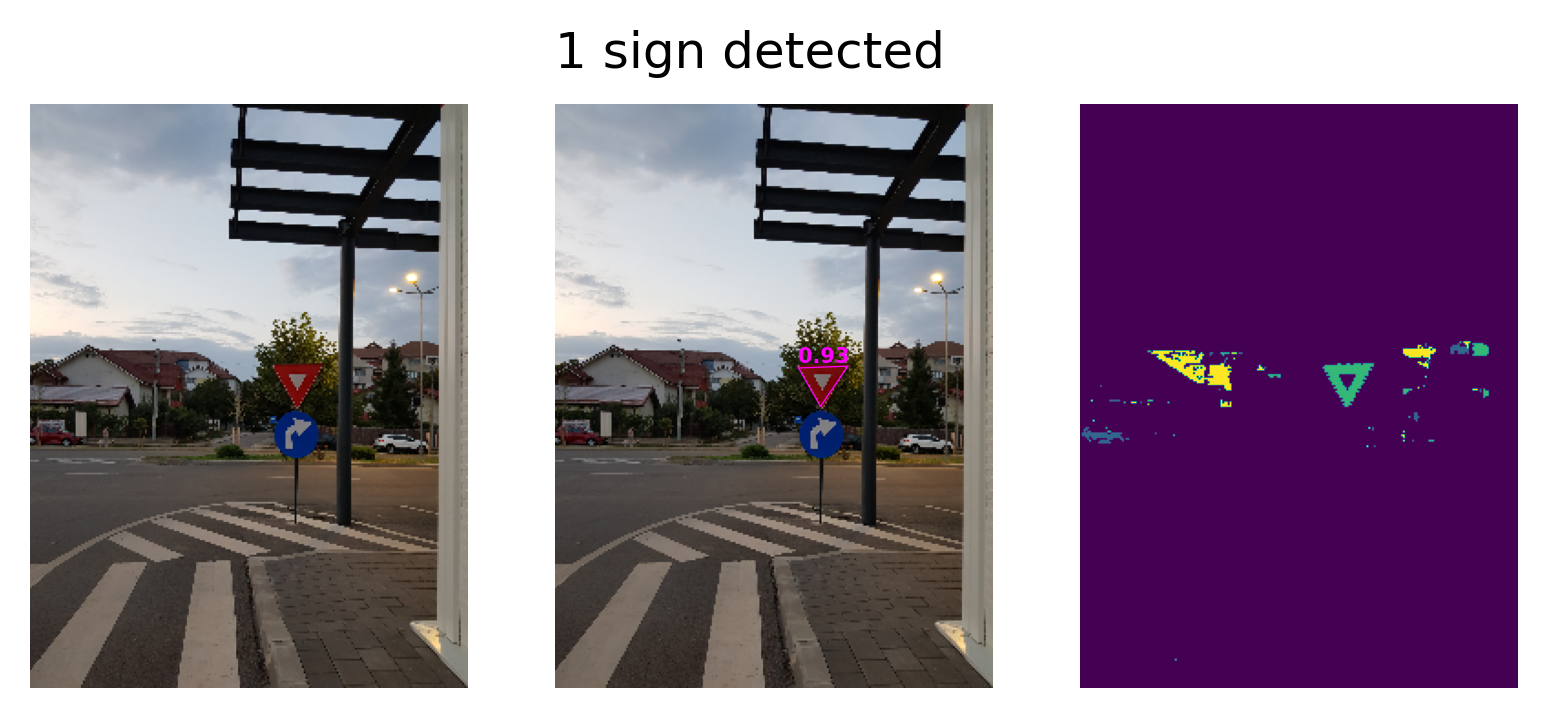

pic 9
avg time 0.3239902019500732


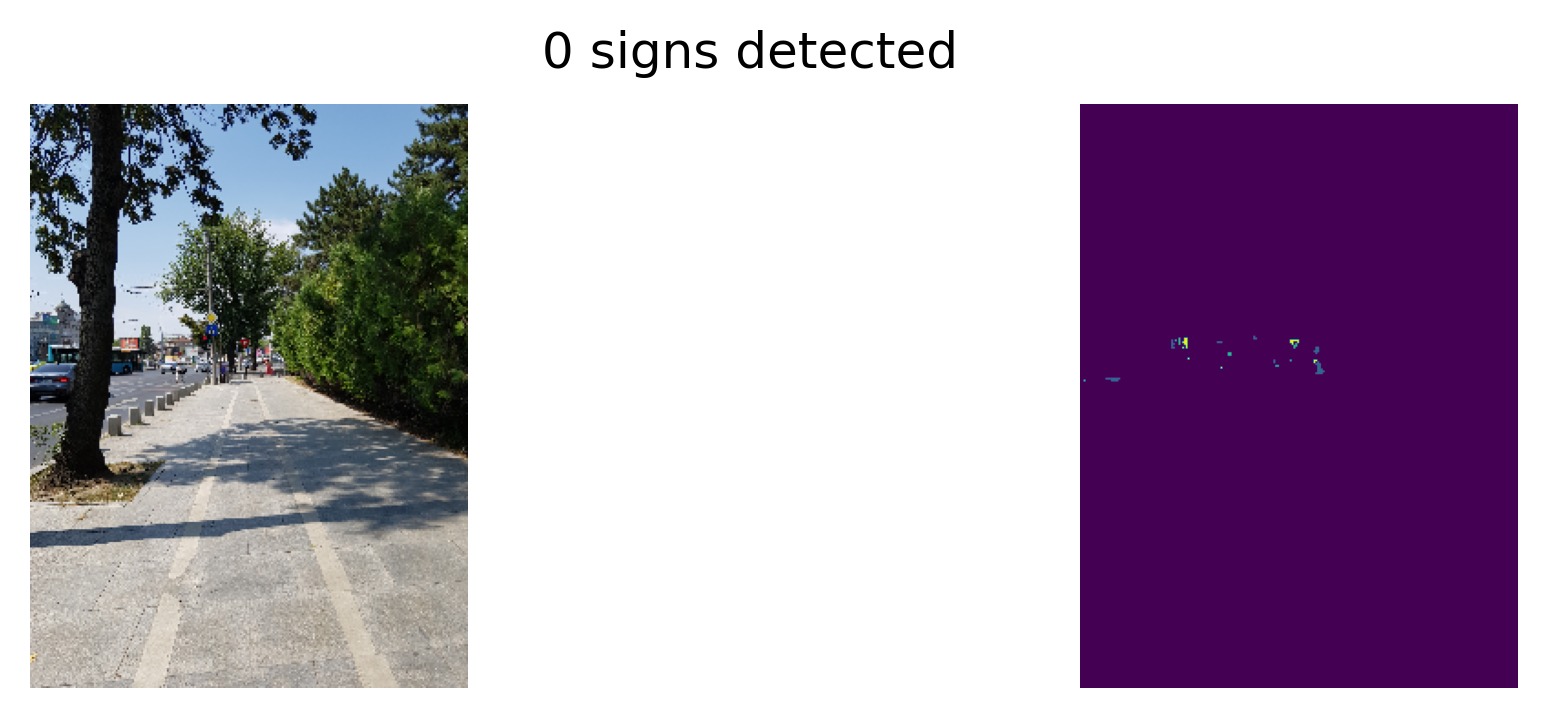

pic 10
outer: 0.8734233671957121 inner 0.938876937150194
avg time 0.3165560852397572


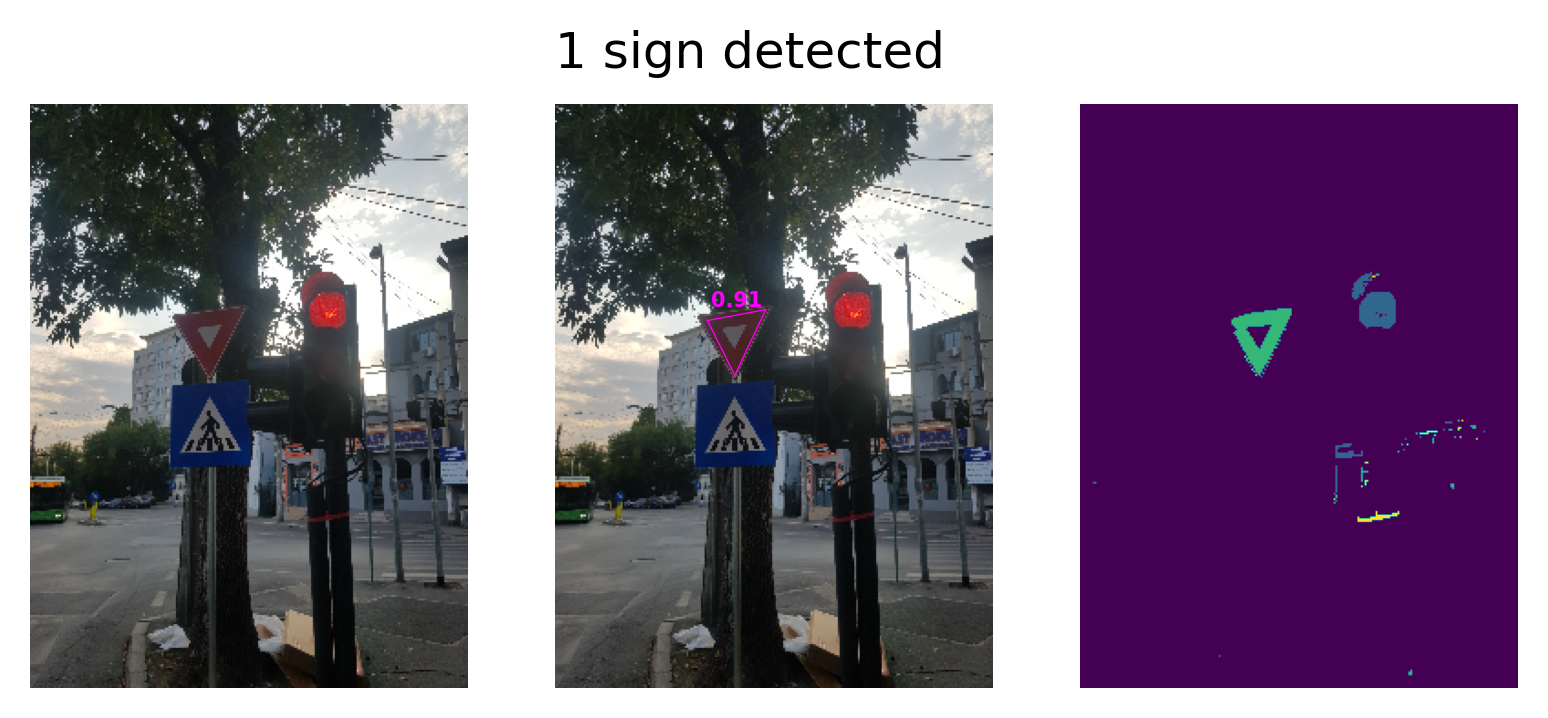

pic 11
outer: 0.9544860334512957 inner 0.9327261046284497
too much red outside: 1.0
avg time 0.3111206491788228


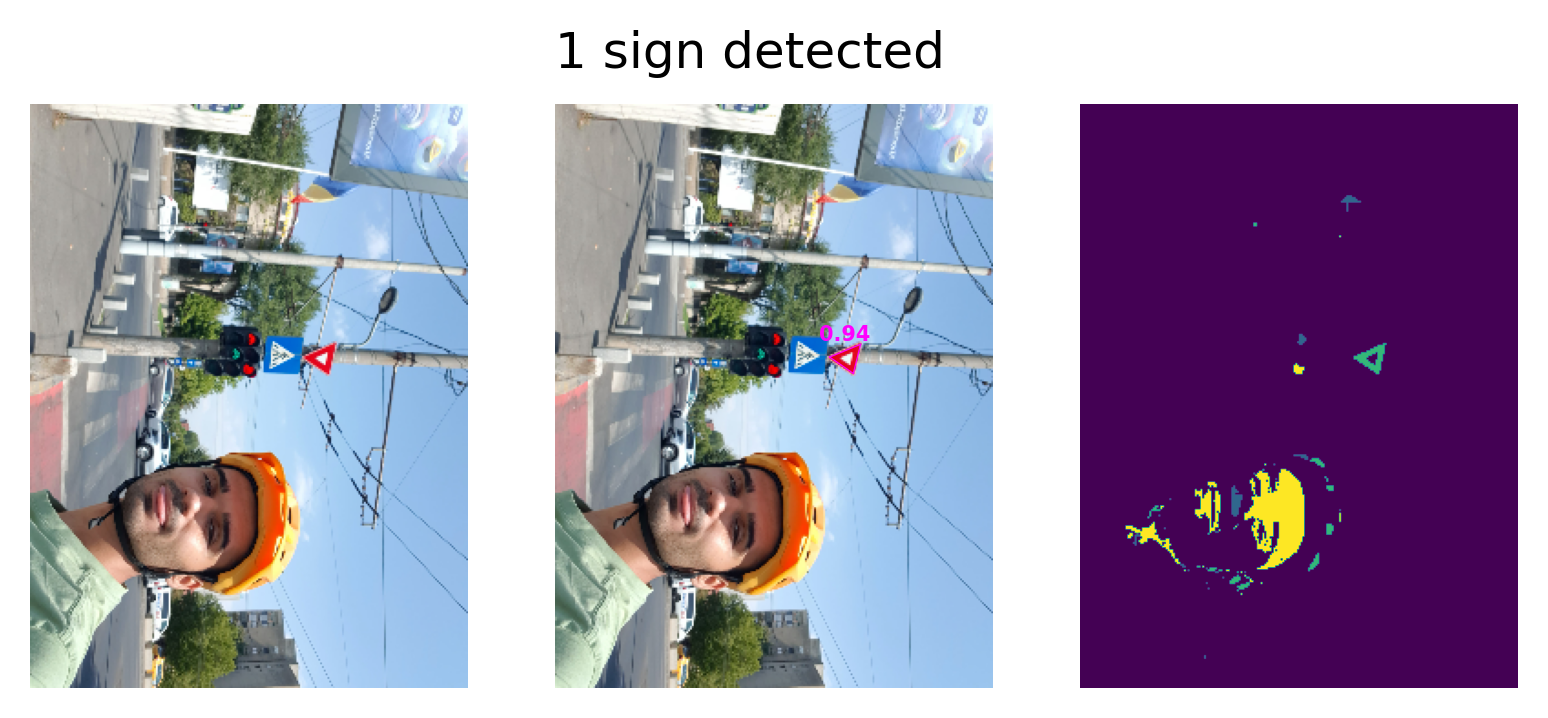

pic 12
too much red outside: 0.5945945945945946
outer: 1.0030192215928937 inner 0.9122214696718576
avg time 0.3150287958291861


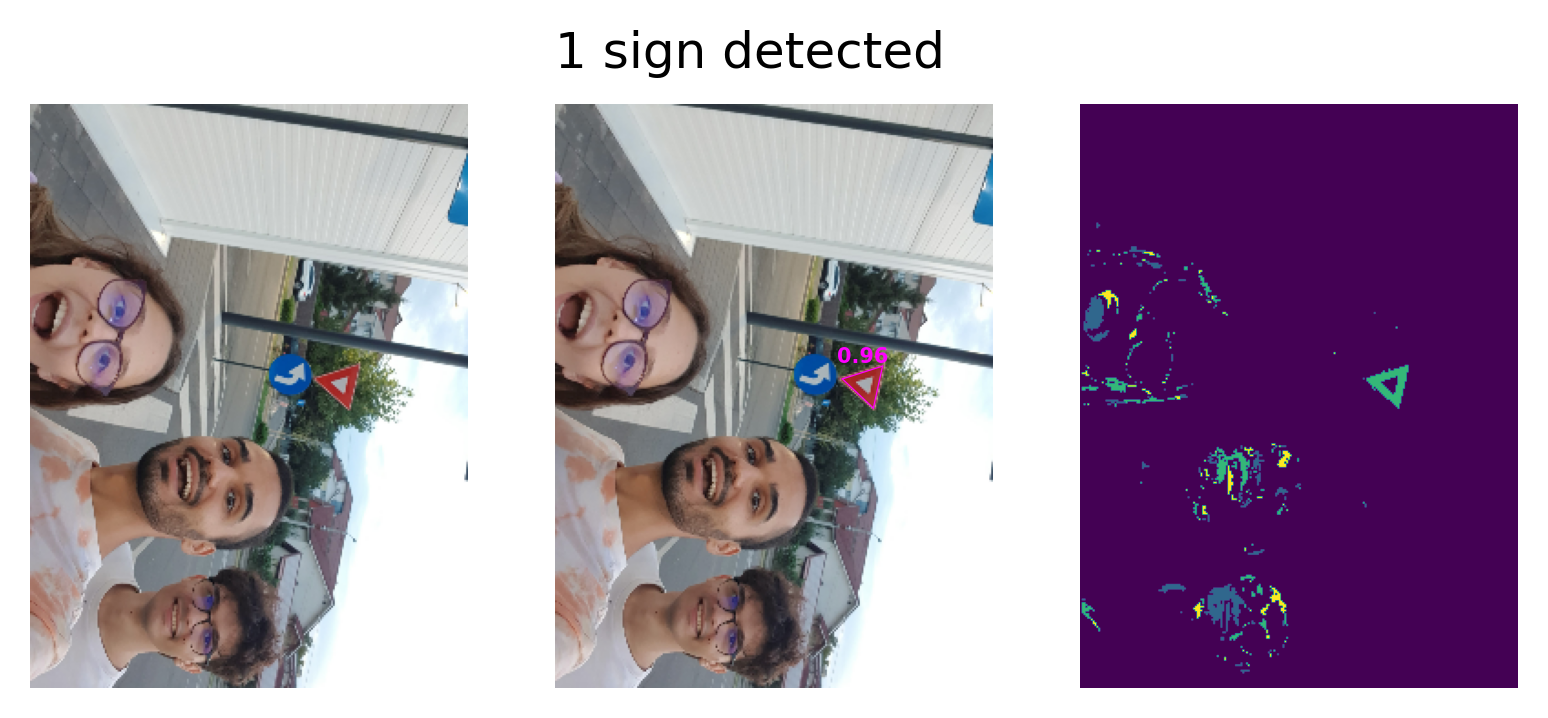

pic 13
outer: 0.5955032359645853 inner 0.9614763021370785
too much red outside: 0.8
too much red outside: 0.9090909090909091
avg time 0.308403560093471


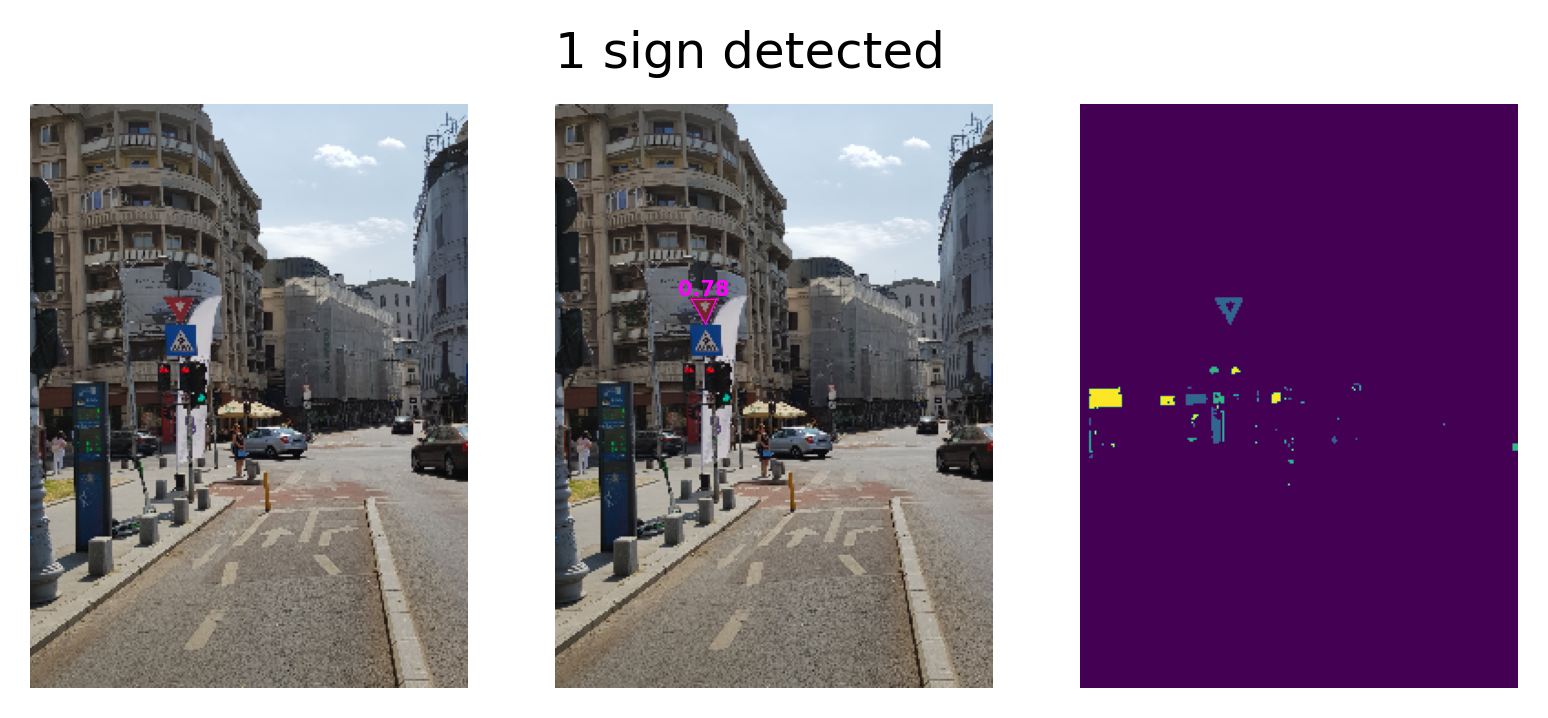

pic 14
outer: 0.0 inner 1.211240310077514
avg time 0.3110130945841471


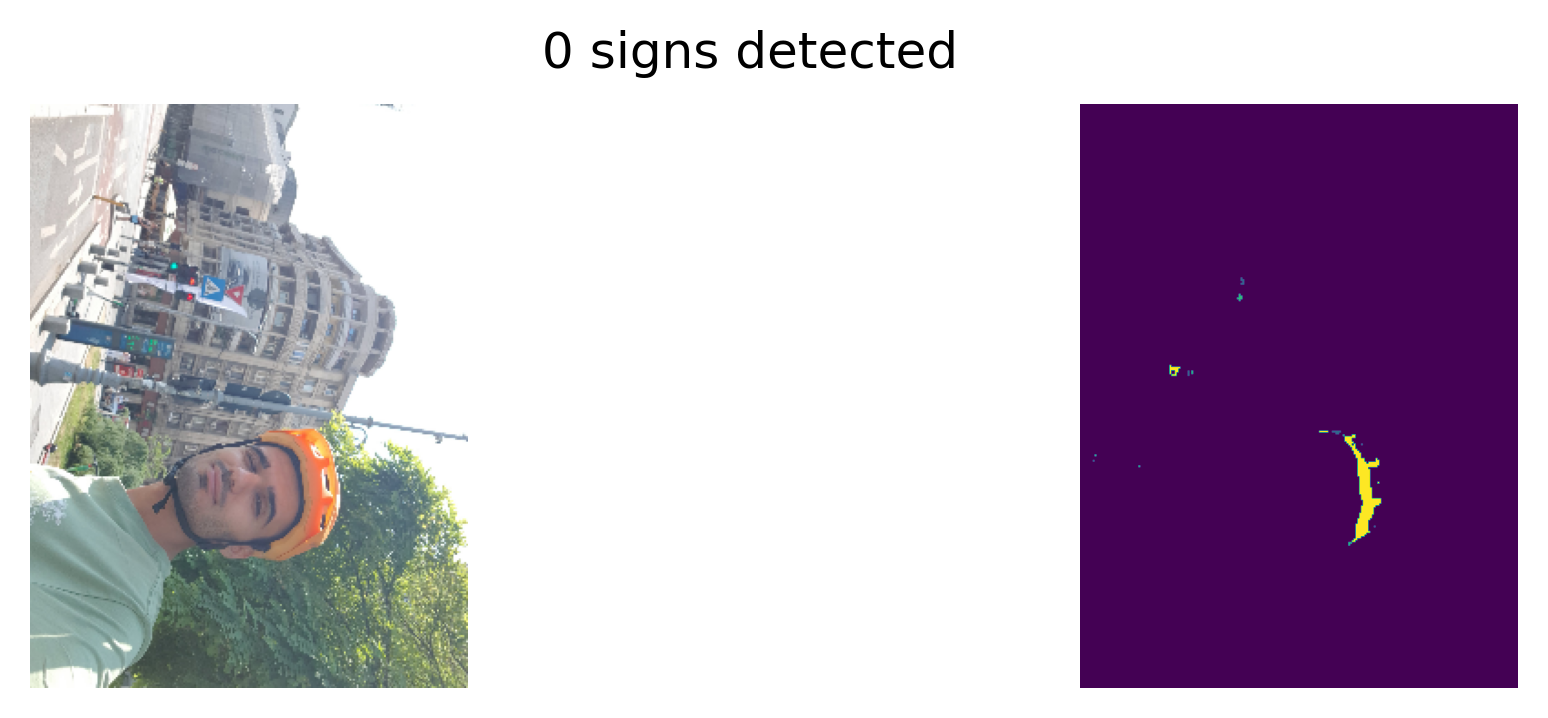

signs detedted 10


In [8]:
print(len(gw_images))
scores = []

total_detected = 0

avg_time = 0
time_count = 0

for i in range(0, len(gw_images)):
    plt.figure(dpi=300)
    plt.subplot(1, 3, 1)
    plt.axis('off')
    plt.imshow(gw_images[i])
    print("pic", i)

    start = time.time()
    detections_in_pic, label_mat = detect_gw(gw_images[i])
    total_detected += detections_in_pic
    avg_time += time.time() - start
    time_count += 1
    print("avg time", avg_time/time_count)

    plt.suptitle(str(detections_in_pic) + (" signs" if detections_in_pic != 1 else " sign") + " detected", fontsize=12, y=0.75)
    plt.subplot(1, 3, 3)
    plt.axis('off')
    plt.imshow(label_mat)
    plt.show()

print("signs detedted", total_detected)


In [9]:

########### 800 x 600
# 6 fals pozitive
# 43 true pozitive
# ? poate prea forgiveing cu rosu?

########### 320 x 240
# 19 true positives
# 1 fals positive

###########
# 42 true positives
# 1 false positive

###########
# 65 true positives
# 4 false positives

###########
# 67 true positives
# 0 false positives

# avg time per pic:
# 0.396 inainte
# 0.2244 cu is red pe matrice deja hsv
# 0.1413 fara afisari
